In [1]:
import chart

In [121]:
def print_dict_on_csv(dict_obj,keys,header, CSV_PATH):
    str_csv = header+"\n"
    for k in dict_obj:
        str_row = ""
        for field_k in keys:
            if field_k == 'key':
                str_row = str_row + '"'+ k + '",'
            elif field_k in dict_obj[k]:          
                str_row = str_row + '"'+ dict_obj[k][field_k] + '",'
                
        str_row = str_row[:-1] 
        str_csv = str_csv + str_row + "\n"
    
    str_csv = str_csv[:-2]
        
    file_res = open(CSV_PATH,'w')  
    file_res.write(str_csv) 
    file_res.close()

In [2]:
#Example demeo
#chart.demo_ex().show()


#Data sample
############
x_data = ['journal','book','proceedings','dataset','others']
data_sample = {
     'Open in COCI': {'x': x_data, 'y': [1000,2000,3000,2500,5000] },
     'Close in Crossref': {'x': x_data, 'y': [400,600,300,850,1800] }
}

{'journal': [1000, 400], 'book': [2000, 600], 'proceedings': [3000, 300], 'dataset': [2500, 850], 'others': [5000, 1800]}


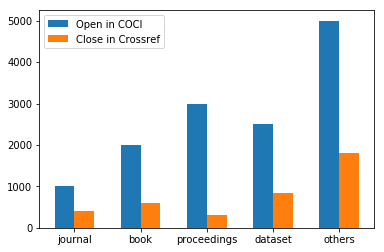

In [3]:
chart.plotBars(data_sample).show()

In [4]:

#https://api.crossref.org/v1/types
#all the possible types
all_types = {
      "book-section": {
        "label": "Book Section",
        "macro_type": "book"
      },
      "monograph": {
        "label": "Monograph",
        "macro_type": "book"
      },
      "report": {
        "label": "Report",
        "macro_type": "other"
      },
      "peer-review":{
        "label": "Peer Review",
        "macro_type": "other"
      },
      "book-track":{
        "label": "Book Track",
        "macro_type": "book"
      },
      "journal-article":{
        "label": "Journal Article",
        "macro_type": "journal"
      },
      "book-part":{
        "label": "Part",
        "macro_type": "book"
      },
      "other":{
        "label": "Other",
        "macro_type": "other"
      },
      "book":{
        "label": "Book",
        "macro_type": "book"
      },
      "journal-volume":{
        "label": "Journal Volume",
        "macro_type": "journal"
      },
      "book-set":{
        "label": "Book Set",
        "macro_type": "book"
      },
      "reference-entry": {
        "label": "Reference Entry",
        "macro_type": "other"
      },
      "proceedings-article": {
        "label": "Proceedings Article",
        "macro_type": "proceedings"
      },
      "journal": {
        "label": "Journal",
        "macro_type": "journal"
      },
      "component":{
        "label": "Component",
        "macro_type": "other"
      },
      "book-chapter": {
        "label": "Book Chapter",
        "macro_type": "book"
      },
      "proceedings-series": {
        "label": "Proceedings Series",
        "macro_type": "proceedings"
      },
      "report-series": {
        "label": "Report Series",
        "macro_type": "other"
      },
      "proceedings": {
        "label": "Proceedings",
        "macro_type": "proceedings"
      },
      "standard":{
        "label": "Standard",
        "macro_type": "other"
      },
      "reference-book": {
        "label": "Reference Book",
        "macro_type": "book"
      },
      "posted-content": {
        "label": "Posted Content",
        "macro_type": "other"
      },
      "journal-issue": {
        "label": "Journal Issue",
        "macro_type": "journal"
      },
      "dissertation": {
        "label": "Dissertation",
        "macro_type": "book"
      },
      "dataset": {
        "label": "Dataset",
        "macro_type": "dataset"
      },
      "book-series": {
        "label": "Book Series",
        "macro_type": "book"
      },
      "edited-book": {
        "label": "Edited Book",
        "macro_type": "book"
      },
      "standard-series": {
        "label": "Standard Series",
        "macro_type": "other"
      }
}

In [5]:
macro_type = {
        'journal': {
            'label': 'Journal',
            'value':{'coci_open': 0,'crossref_close':0}
        },

        'book': {
            'label': 'Book',
            'value':{'coci_open': 0,'crossref_close':0}
        },

        'proceedings': {
            'label': 'Proceedings',
            'value':{'coci_open': 0,'crossref_close':0}
        },

        'dataset': {
            'label': 'Dataset',
            'value':{'coci_open': 0,'crossref_close':0}
        },

        'other': {
            'label': 'Other',
            'value':{'coci_open': 0,'crossref_close':0}
        }
}

In [6]:
#PROCESSING THE DATA

import csv

#Load the COCI data
#COCI_CSV_PATH = "../data/non_open_sample.csv"
COCI_CSV_PATH = "/Users/ivan.heibi/project.loc/croci/data/non_open.csv"
STREAM_BUFFER = 1000

other_list = {}

with open(COCI_CSV_PATH,'r') as cocicsv:
    cocicsv_reader = csv.DictReader(cocicsv)
    for row in cocicsv_reader:
        #"doi","type","cited_by","non_open"

        if row['type'] not in all_types:
            all_types[row['type']] = {'label': row['type'],"macro_type": "other"}

        r_m_type = all_types[row['type']]['macro_type']
        
        #check the others
        if r_m_type == 'other':
            if row['type'] not in other_list:
                other_list[row['type']] = {'value':{'coci_open':0,'crossref_close':0}}
            other_list[row['type']]['value']['coci_open'] += int(row['cited_by'])
            other_list[row['type']]['value']['crossref_close'] += int(row['non_open'])
            
        #in case is not int
        try:
            macro_type[r_m_type]['value']['coci_open'] += int(row['cited_by'])
        except Exception as e:
            macro_type[r_m_type]['value']['coci_open'] += 0

        #in case is not int
        try:
            macro_type[r_m_type]['value']['crossref_close'] += int(row['non_open'])
        except Exception as e:
            macro_type[r_m_type]['value']['crossref_close'] += 0

In [ ]:
#Write the results on a new .csv file
#Load the COCI data
CROCI_RES = "../data/croci_res.csv"

str_csv = "type,label,coci_open,crossref_close\n"
for r_m_type in macro_type:
    str_csv = str_csv + r_m_type + "," + macro_type[r_m_type]['label'] + ',' + str(macro_type[r_m_type]['value']['coci_open']) + "," + str(macro_type[r_m_type]['value']['crossref_close']) +"\n"

file_res = open(CROCI_RES,'w')  
file_res.write(str_csv) 
file_res.close()

In [ ]:
# journal, book, proceedings, dataset, other
#Plot them
#Data sample
############
x_data = ['journal','book','proceedings','dataset','other']

o_in_coci = []
for k in macro_type:
    o_in_coci.append(macro_type[k]['value']['coci_open'])
    
c_in_crossref = []
for k in macro_type:
    c_in_crossref.append(macro_type[k]['value']['crossref_close'])
    
data_plot = {
     'Open in COCI': {'x': x_data, 'y': o_in_coci },
     'Close in Crossref': {'x': x_data, 'y': c_in_crossref }
}

In [ ]:
chart.plotBars(data_plot).show()

In [108]:
#PUBLISHERS TABLE
import re

publishers = {}
OPEN_PUB_CSV = "../data/open_crossref_pub.csv"
CLOSE_PUB_CSV = "../data/closed_crossref_pub.csv"

In [110]:
with open(OPEN_PUB_CSV,'r') as cocicsv:
    openpub_reader = csv.DictReader(cocicsv)
    #"Member Name & ID","Sponsored member & prefix","Reference Visibility","Total Backfile DOIs","Total Current DOIs","Deposits Backfile References","Deposits Current References"
    for row in openpub_reader:  
        key = row['Sponsored member & prefix']
        publishers[key] = {}
        publishers[key]['sponsored_mem'] = row['Sponsored member & prefix']
        publishers[key]['mem_name'] = row['Member Name & ID']
        publishers[key]['visibility'] = row['Reference Visibility']
        publishers[key]['tot_backfile_dois'] = row['Total Backfile DOIs']
        publishers[key]['tot_current_dois'] = row['Total Current DOIs']
        publishers[key]['deposits_backfile_ref'] = row['Deposits Backfile References']
        publishers[key]['deposits_current_ref'] = row['Deposits Current References']
        
        matchObj = re.search('(10\..*)', key,re.U)
        if matchObj:
            publishers[key]['doi_prefix'] = matchObj.group(0).split(" ")[0]
        else:
            publishers[key]['doi_prefix'] = 'None'
            

In [101]:
#OPEN_RES = "../data/open_crossref_pub_extended.csv"

#str_csv = "sponsored_name,doi_prefix,mem_name,visibility,tot_backfile_dois,tot_current_dois,deposits_backfile_ref,deposits_current_ref\n"
#for p in publishers:    
#    str_csv = str_csv +'"'+ p +'"'+ ',"' + publishers[p]['doi_prefix'] + '","' + publishers[p]['mem_name'] + '","' + publishers[p]['visibility'] + '",'+ publishers[p]['tot_backfile_dois'] + ','+ publishers[p]['tot_current_dois'] + ','+ publishers[p]['deposits_backfile_ref'] + ','+ publishers[p]['deposits_current_ref']+ '\n'
    
#file_res = open(OPEN_RES,'w')  
#file_res.write(str_csv) 
#file_res.close()

In [116]:
#PROCESSING THE Publishers DATA
import csv

publishers_dict = {}
for p in publishers:
    if publishers[p]['doi_prefix'] not in publishers_dict:
        publishers_dict[publishers[p]['doi_prefix']] = []
    publishers_dict[publishers[p]['doi_prefix']].append(publishers[p])


COCI_CSV_PATH = "/Users/ivan.heibi/project.loc/croci/data/non_open.csv"
publishers_data = {}
stream_buf = 100000

with open(COCI_CSV_PATH,'r') as cocicsv:
    cocicsv_reader = csv.DictReader(cocicsv)
    for row in cocicsv_reader:
        #"doi","type","cited_by","non_open"
        
        doi_pref = str(row['doi']).split("/")[0]
        if doi_pref not in publishers_data:
            publishers_data[doi_pref] = {'value':{'coci_open':0,'crossref_close':0}}
                       
        #in case is not int
        try:
            publishers_data[doi_pref]['value']['coci_open'] += int(row['cited_by'])
        except Exception as e:
            publishers_data[doi_pref]['value']['coci_open'] += 0

        #in case is not int
        try:
            publishers_data[doi_pref]['value']['crossref_close'] += int(row['non_open'])
        except Exception as e:
            publishers_data[doi_pref]['value']['crossref_close'] += 0
        
        stream_buf -= 1
        #if stream_buf == 0:
        #    break

In [122]:
#print_dict_on_csv(publishers_data,['key','coci_open','crossref_close'],'doi_pref,coci_open,crossref_close', CSV_PATH)

In [130]:
CSV_PATH = "../data/pref_doi.csv"

str_csv = 'doi_pref,name,coci_open,crossref_close,crossref_visibility,tot_dois,deposits_flag\n'
for p_d in publishers_data:  
    mem_name = "nn"
    visibility = "nn"
    tot_dois = "nn"
    deposits_flag = "nn"
    if p_d in publishers_dict:
        mem_name = ""
        visibility = ""
        tot_dois = ""
        deposits_flag = ""
        for elem in publishers_dict[p_d]:
            mem_name = mem_name +'[[' + elem['mem_name'] + ']]'
            visibility = visibility +'[[' + elem['visibility'] + ']]'
            tot_dois = tot_dois +'[["' + elem['tot_backfile_dois'] + ','+ elem['tot_current_dois'] +'"]]'
            deposits_flag = deposits_flag +'[["' + elem['deposits_backfile_ref'] + ','+ elem['deposits_current_ref'] +'"]]'
        
    str_csv = str_csv +'"'+ p_d +'"'+',"'+mem_name+'",' + str(publishers_data[p_d]['value']['coci_open']) + ',' + str(publishers_data[p_d]['value']['crossref_close']) + ','+ visibility +','+ tot_dois + ','+ deposits_flag + '\n'
    
file_res = open(CSV_PATH,'w')  
file_res.write(str_csv) 
file_res.close()

In [162]:
file_res = open('../data/publishers_cits.csv','w')  
file_res.write('publisher,doi_prefix,coci_open_cit,crossref_close_cit,total_cit\n')  
file_res.close()

In [181]:
import urllib.request
import json

#BUILD INDEX
index_processed = {}
with open('../data/publishers_cits.csv','r') as cocicsv:
    cocicsv_reader = csv.DictReader(cocicsv)
    for row in cocicsv_reader:
        index_processed[row['doi_prefix']] = True
        
        
#PROCESS the Stream
extended_publishers = []
STREAM_BUF = 1000
with open("../data/publishers_stats.csv",'r') as cocicsv:
    cocicsv_reader = csv.DictReader(cocicsv)
    for row in cocicsv_reader:
        if(row['doi_pref'] not in index_processed):
            entry_row = row
            if row['name'] == 'nn':
                api_call = 'http://api.crossref.org/prefixes/'+row['doi_pref']
                try:
                    contents = urllib.request.urlopen(api_call).read()
                    contents = json.loads(contents)
                    entry_row['name'] = contents['message']['name']
                    entry_row['crossref_member'] = contents['message']['member']
                    #print(api_call, "::",contents['message']['name'])
                except Exception as e:
                    continue
            else:
                row['name'] = re.search('\[\[(.*)\]\]', row['name'] ,re.U).group(1)

            extended_publishers.append(entry_row)

            #publisher,coci_open_cit,crossref_close_cit,total_cit
            file_res = open('../data/publishers_cits.csv','a')  
            file_res.write('"'+entry_row['name']+'","'
                           + entry_row['doi_pref'] +'","'
                           + entry_row['coci_open'] +'","'
                           + entry_row['crossref_close'] +'","'
                           + str(int(entry_row['coci_open']) + int(entry_row['crossref_close']))
                           +'"\n')  
            file_res.close()

            STREAM_BUF -= 1
            if STREAM_BUF == 0:
                break
        
    

In [183]:
#PROCESS the Stream
index_publishers_name = {}
with open("../data/publishers_cits_extended.csv",'r') as cocicsv:
    #publisher,doi_prefix,coci_open_cit,crossref_close_cit,total_cit
    cocicsv_reader = csv.DictReader(cocicsv)
    for row in cocicsv_reader:
        if row['publisher'] not in index_publishers_name:
            index_publishers_name[row['publisher']] = {}
            index_publishers_name[row['publisher']]['doi_prefix'] = []
            index_publishers_name[row['publisher']]['coci_open_cit'] = 0
            index_publishers_name[row['publisher']]['crossref_close_cit'] = 0
            index_publishers_name[row['publisher']]['total_cit'] = 0
        
        index_publishers_name[row['publisher']]['doi_prefix'].append(row['doi_prefix'])
        index_publishers_name[row['publisher']]['coci_open_cit'] += int(row['coci_open_cit'])
        index_publishers_name[row['publisher']]['crossref_close_cit'] += int(row['crossref_close_cit'])
        index_publishers_name[row['publisher']]['total_cit'] += int(row['total_cit'])

In [191]:
file_res = open('../data/publishers_name_cits.csv','w')  
file_res.write('publisher,doi_prefix,coci_open_cit,crossref_close_cit,total_cit\n')  
file_res.close()

In [192]:
for entry in index_publishers_name:
    file_res = open('../data/publishers_name_cits.csv','a')  
    entry_row = index_publishers_name[entry]
    
    all_dois_prefix = ""
    for d in entry_row['doi_prefix']:
        all_dois_prefix = all_dois_prefix + d + ","
    all_dois_prefix = all_dois_prefix[:-1]
    
    file_res.write('"'+entry+'","'
                    + all_dois_prefix +'","'
                    + str(entry_row['coci_open_cit']) +'","'
                    + str(entry_row['crossref_close_cit']) +'","'
                    + str(entry_row['total_cit'])+'"\n')  
    file_res.close()       